### Single Simulation Run

This script runs the simulation for a specified number of iterations and calculates the win rate based on the results of those iterations.

In [1]:
from minesweeper import Minesweeper, MinesweeperAI

## Setting up simulation parameters
HEIGHT = 12
WIDTH = 12
MINES = 8
iterations = 1000

## Defining a function to simulate a single game
def play_game():
    game = Minesweeper(height=HEIGHT, width=WIDTH, mines=MINES)
    ai = MinesweeperAI(height=HEIGHT, width=WIDTH)
    
    won = lost = False
    while not (won or lost):
        # AI choose a move
        move = ai.make_safe_move() or ai.make_random_move()
        if move is None:
            won = True
            break

        # Make move and update AI
        if game.is_mine(move):
            lost = True
        else:
            nearby = game.nearby_mines(move)
            ai.add_knowledge(move, nearby)
    
    return won

## Defining a function to run multiple simulations
def simulate_games(iterations):
    total_wins = 0
    for _ in range(iterations):
        if play_game():
            total_wins += 1
    win_rate = (total_wins / iterations) * 100
    return win_rate

## Running the simulation and displaying the result
win_rate = simulate_games(iterations)
print(f"Win rate over {iterations} games: {win_rate:.2f}%")


Win rate over 1000 games: 91.00%


### Multiple Simulation Runs with Aggregation

This script runs the simulation for a specified number of iterations multiple times (in separate runs), and then it calculates and plots the win rates of these runs.

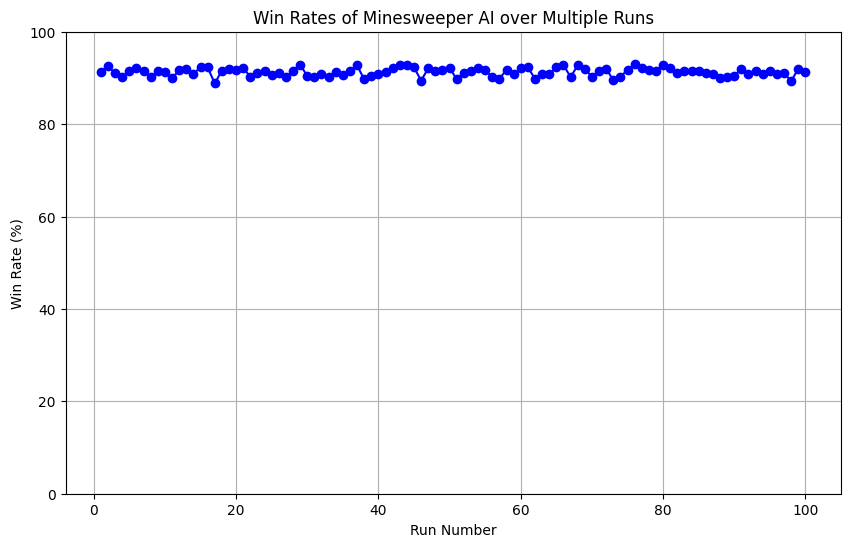

Average win rate over 100 runs: 91.27%


In [1]:
# Minesweeper Simulation Notebook

## Importing necessary modules
import random
import matplotlib.pyplot as plt
from minesweeper import Minesweeper, MinesweeperAI

## Setting up simulation parameters
HEIGHT = 12
WIDTH = 12
MINES = 8
iterations = 1000
runs = 100

## Defining a function to simulate a single game
def play_game():
    game = Minesweeper(height=HEIGHT, width=WIDTH, mines=MINES)
    ai = MinesweeperAI(height=HEIGHT, width=WIDTH)
    
    won = lost = False
    while not (won or lost):
        # AI choose a move
        move = ai.make_safe_move() or ai.make_random_move()
        if move is None:
            won = True
            break

        # Make move and update AI
        if game.is_mine(move):
            lost = True
        else:
            nearby = game.nearby_mines(move)
            ai.add_knowledge(move, nearby)
    
    return won

## Defining a function to run multiple simulations
def simulate_games(iterations):
    total_wins = 0
    for _ in range(iterations):
        if play_game():
            total_wins += 1
    win_rate = (total_wins / iterations) * 100
    return win_rate

## Defining a function to plot win rates over multiple runs
def plot_win_rates(win_rates):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, runs + 1), win_rates, marker='o', linestyle='-', color='b')
    plt.title('Win Rates of Minesweeper AI over Multiple Runs')
    plt.xlabel('Run Number')
    plt.ylabel('Win Rate (%)')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

## Running the simulation and plotting the results
win_rates = [simulate_games(iterations) for _ in range(runs)]
plot_win_rates(win_rates)
print(f"Average win rate over {runs} runs: {sum(win_rates) / runs:.2f}%")
